
# 1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q\right)^3 &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D









# 2.0 Integración

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity


6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

In [207]:
%pylab inline
import numpy as np
import scipy.interpolate as interp
from scipy import misc
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sp

Populating the interactive namespace from numpy and matplotlib


C:\Users\Santiago\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['interp']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1. Derivadas
1.

In [13]:
H = 1
π=np.pi
αD = 5/(π*H**2)
R=np.linspace(-H,H,100)

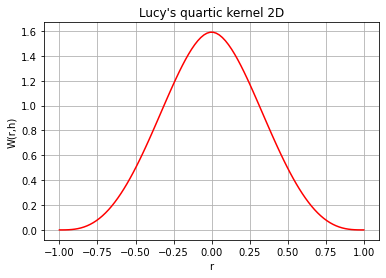

In [14]:
def W(r,h):
    q=np.abs(r)/h
    W=αD*(1+3*q)*(1-q)**3
    return W

plt.plot(R,W(R,H),'r')
plt.title("Lucy's quartic kernel 2D")
plt.xlabel('r')
plt.ylabel('W(r,h)')
plt.grid()
plt.show()

2.

In [17]:
r=sp.symbols('r',real=True)
h=sp.symbols('h')
W(r,h)

(1 - Abs(r)/h)**3*(1.59154943091895 + 4.77464829275686*Abs(r)/h)

In [18]:
dW=W(r,h).diff(r)
dW

4.77464829275686*(1 - Abs(r)/h)**3*sign(r)/h - 3*(1 - Abs(r)/h)**2*(1.59154943091895 + 4.77464829275686*Abs(r)/h)*sign(r)/h

3.

In [19]:
def derivative(func,x0,**kwargs):   #kwargs se mandan como argumento genérico.
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
        
    Tomado del material del profesor Diego.
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

In [20]:
dW1=sp.lambdify([r,h],dW)
dW2=lambda x:derivative(lambda r:W(r,H),x,dx=1e-3)

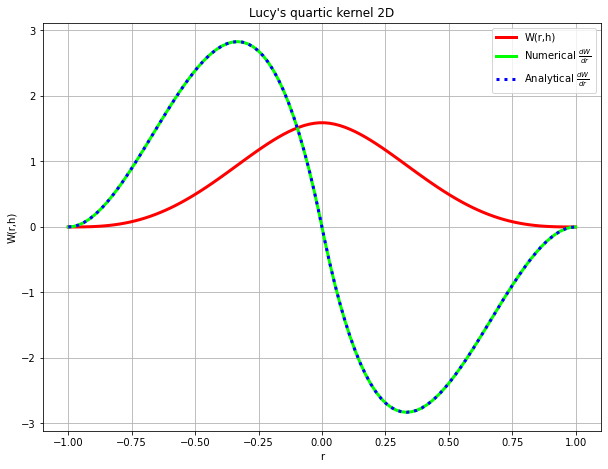

In [22]:
plt.figure(figsize=(10,7.5))
plt.plot(R,W(R,H),'r',label='W(r,h)',linewidth=3)
plt.plot(R,dW2(R),'lime',label=r'Numerical $\frac{dW}{dr}$',linewidth=3)
plt.plot(R,dW1(R,H),'b:',label=r'Analytical $\frac{dW}{dr}$',linewidth=3)
plt.title("Lucy's quartic kernel 2D")
plt.xlabel('r')
plt.ylabel('W(r,h)')
plt.grid()
plt.legend()
plt.show()

# 2. Integración
1. _Método del trapecio:_ dada una función $f$ y un conjunto de puntos $\{x_1,...,x_N\}$ uniformemente espaciados, se define un trapecio debajo de la curva con vértices $x_i$, $x_{i+1}$, $f(x_i)$ y $f(x_{i+1})$, cuya área es $A=\dfrac{h(f(x_{i+1})+f(x_i))}{2}$, con $h=\dfrac{x_N-x_1}{N-1}$. El área debajo de la curva entre $x_1$ y $x_N$ se puede aproximar sumando las áreas de los trapecios determinados por cada par de puntos:

\begin{equation}
\int_{x_1}^{x_N}f(x)dx\approx\frac{h}{2}f(x_1)+hf(x_2)+\dots+hf(x_{N-1})+\frac{h}{2}f(x_N)
\end{equation}

2. _Método de Simpson:_ dada una función $f$ y un conjunto de puntos $\{x_1,...,x_N\}$ uniformemente espaciados donde $N$ es un número impar. El área debajo de la curva se puede aproximar como la suma de las áreas bajo las parábolas determinadas por tres puntos sucesivos del conjunto, por lo cual se requiere que sea un número impar de puntos. El área debajo de una sola de las parábolas es $A\approx\dfrac{h}{3}f(x_{i})+\dfrac{4h}{3}f(x_{i+1})+\dfrac{h}{3}f(x_{i+2})$. Así, el área total debajo de la curva es:

\begin{equation}
\int_{x_1}^{x_N}f(x)dx\approx\frac{h}{3}f(x_1)+\frac{4h}{3}f(x_2)+\frac{2h}{3}f(x_3)+\frac{4h}{3}f(x_4)+\dots+\frac{4h}{3}f(x_{N-1})+\frac{h}{3}f(x_N)
\end{equation}

3. _Método de cuadratura:_ dada una función $f$ definida entre $a$ y $b$, el área bajo la curva se puede aproximar como la suma de las áreas de $n$ rectángulos de base $h$ y altura $\dfrac{f(x_i)+f(x_{i+1})}{2}$, donde $x_i=a+(i-1)h$. En ese sentido, se puede generar un conjunto de puntos $\{x_1,...,x_{n+1}\}$ uniformemente espaciados, y la expresión para este método es igual que la expresión del método del trapecio:

\begin{equation}
\int_{a}^{b}f(x)dx\approx\frac{h}{2}f(x_1)+hf(x_2)+\dots+hf(x_{n})+\frac{h}{2}f(x_{n+1})
\end{equation}

4.

a.

In [141]:
def f1(x):
    return np.exp(1-np.sqrt(x))

X1=np.linspace(0,π,101)

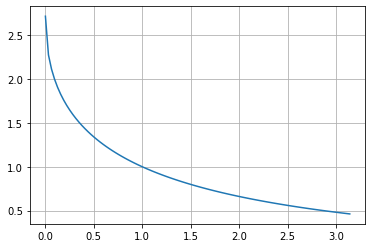

In [214]:
plt.plot(X1,f1(X1))
plt.grid()
plt.show()

In [143]:
I1q=integrate.quad(f1,0,π,epsabs=1e-5)
I1t=integrate.trapz(f1(X1),X1,dx=1e-5)
I1s=integrate.simps(f1(X1),X1,dx=1e-5)

I1q[0],I1t,I1s

(2.875491135437586, 2.878517278289438, 2.8767188557412786)

In [144]:
I1ex=sp.integrate(sp.exp(1-sp.sqrt(x)),(x,0,π)).evalf()
I1ex

2.87549113543758

b.

In [145]:
def f2(x):
    return 1/(np.sqrt(np.tan(x)))

X2=np.linspace(1.49e-3,π/2,101)

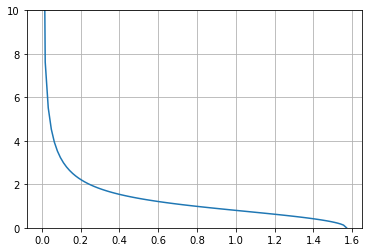

In [146]:
plt.plot(X2,f2(X2))
plt.grid()
plt.ylim(0,10)
plt.show()

In [147]:
I2q=integrate.quad(f2,0,π/2,epsabs=1e-5)
I2t=integrate.trapz(f2(X2),X2)
I2s=integrate.simps(f2(X2),X2)

I2q[0],I2t,I2s

(2.2214414690791098, 2.226363952392048, 2.1827093581855666)

In [148]:
I2ex=sp.integrate(1/(sp.sqrt(sp.tan(x))),(x,0,π/2)).evalf()
I2ex

2.22144146907918

c.

In [157]:
def f3(x):
    return 1/(1+x**2)

X3=np.linspace(-1e5,1e5,int(1e7+1))

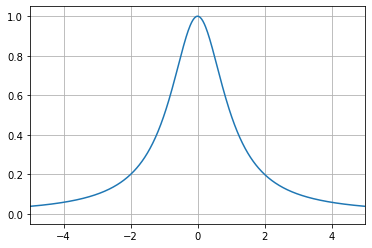

In [158]:
plt.plot(X3,f3(X3))
plt.xlim(-5,5)
plt.grid()
plt.show()

In [159]:
I3q=integrate.quad(f3,np.NINF,np.inf,epsabs=1e-5)
I3t=integrate.trapz(f3(X3),X3)
I3s=integrate.simps(f3(X3),X3)

I3q[0],I3t,I3s

(3.141592653589793, 3.1415726535897925, 3.141572653589793)

In [163]:
I3ex=sp.integrate(1/(1+x**2),(x,-sp.oo,sp.oo)).evalf()
I3ex

3.14159265358979

d.

In [200]:
x=sp.symbols('x')
y=sp.symbols('y')
i=sp.integrate(2*y*sp.sin(x)+(sp.cos(x))**2,(y,sp.sin(x),sp.cos(x)))
i

-sin(x)**3 + cos(x)**3

In [203]:
f4=sp.lambdify(x,i)
X4=np.linspace(0,π/4)

I4q=integrate.quad(f4,0,π/4,epsabs=1e-5)
I4t=integrate.trapz(f4(X4),X4,dx=1e-5)
I4s=integrate.simps(f4(X4),X4,dx=1e-5)
I4q[0],I4t,I4s

(0.5118446353109126, 0.511799217398145, 0.5118441038993553)

In [209]:
I4ex=sp.integrate(i,(x,0,π/4))
I4ex

0.511844635310913

e.

In [205]:
def f5(x):
    return 1/(np.log(x))

X5=np.linspace(np.e,2*np.e,101)

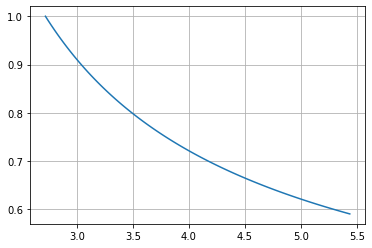

In [208]:
plt.plot(X5,f5(X5))
plt.grid()
plt.show()

In [210]:
I5q=integrate.quad(f5,np.e,2*np.e,epsabs=1e-5)
I5t=integrate.trapz(f5(X5),X5,dx=1e-5)
I5s=integrate.simps(f5(X5),X5,dx=1e-5)
I5q[0],I5t,I5s

(2.0038105616240243, 2.003829262576877, 2.0038105636867156)

In [213]:
I5ex=sp.integrate(1/sp.log(x),(x,sp.exp(1),2*sp.exp(1)))
I5ex.evalf()

2.00381056162402